In [6]:
from glob import glob
from datetime import datetime, timezone

import netCDF4
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
import xarray as xr

import pyart

import read_mira_radar

In [ ]:
# test = pyart.aux_io.read_kazr("/home/camila/git/amazon-storms-aerosols/radar_processing/mira_quicklooks/20200508_1200.nc")

test = netCDF4.Dataset("/home/camila/git/amazon-storms-aerosols/radar_processing/mira_quicklooks/20200508_1200.nc")
test

In [2]:
data_path = "/home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/"

# Single file
# pmira, pmira_melthei, pmira_mrm = read_mira_radar.read_mira(data_path + "2021/11/09/20211109_0900.mmclx")
# mira1 = netCDF4.Dataset(data_path + "2021/11/09/20211109_0900.mmclx")
# mira2 = netCDF4.Dataset(data_path + "2021/09/28/20210928_0900.mmclx")

# Multiple files
files = sorted(glob(data_path + "2021/11/09/" + "*.mmclx", recursive=True))
# files = sorted(glob(data_path + "test_files/" + "*_rp.mmclx", recursive=True))
# pmira_24h, pmira_melthei_24h, pmira_mrm_24h = read_mira_radar.read_multi_mira(
#     files, for_quicklooks=True, ql_res=1
# )
# files = []
# files.append(sorted(glob(data_path + "2021/06/11/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/12/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/13/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/14/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/15/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/16/" + "*.mmclx", recursive=True)))
# files.append(sorted(glob(data_path + "2021/06/17/" + "*.mmclx", recursive=True)))
# files = [item for sublist in files for item in sublist]
# print(files)
pmira_w, pmira_melthei_w, pmira_mrm_w = read_mira_radar.read_multi_mira(
    files, for_quicklooks=True, ql_res=2
)

Reading file:  /home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/2021/11/09/20211109_0000.mmclx
24
(703,)
(30,)


/home/camila/miniconda3/envs/radar-processing/lib/python3.8/site-packages/skimage/measure/block.py:86: RuntimeWarning: All-NaN slice encountered
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


(30, 573)
(703, 573)
[1636416006 1636416129 1636416252 1636416375 1636416498 1636416621
 1636416744 1636416867 1636416990 1636417113 1636417235 1636417358
 1636417481 1636417604 1636417727 1636417850 1636417973 1636418096
 1636418219 1636418341 1636418464 1636418587 1636418710 1636418833
 1636418956 1636419079 1636419202 1636419325 1636419447 1636419570]
Reading file:  /home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/2021/11/09/20211109_0100.mmclx
24
(703,)
(30,)


KeyboardInterrupt: 

In [ ]:
for var in mira.variables.keys():
    print(var, "-", mira.variables[var].long_name)

# print(mira.fields.keys())
# print(mira.variables["npw1"])

In [ ]:
times = pyart.util.datetimes_from_radar(pmira_24h)
times = times.astype("datetime64[ns]")
date_str = str(times[0])[:10]

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "SNRg",
        vmin=pmira_24h.fields["SNRg"]["yrange"][0],
        vmax=pmira_24h.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_24h["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "Ze",
        vmin=pmira_24h.fields["Ze"]["yrange"][0],
        vmax=pmira_24h.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "VEL",
        vmin=pmira_24h.fields["VEL"]["yrange"][0],
        vmax=pmira_24h.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "LDRg",
        vmin=pmira_24h.fields["LDRg"]["yrange"][0],
        vmax=pmira_24h.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()


In [ ]:
times = pyart.util.datetimes_from_radar(pmira_24h)
times = times.astype("datetime64[ns]")
date_str = str(times[0])[:10]

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "SNRg",
        vmin=pmira_24h.fields["SNRg"]["yrange"][0],
        vmax=pmira_24h.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_24h["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "Ze",
        vmin=pmira_24h.fields["Ze"]["yrange"][0],
        vmax=pmira_24h.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "VEL",
        vmin=pmira_24h.fields["VEL"]["yrange"][0],
        vmax=pmira_24h.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "LDRg",
        vmin=pmira_24h.fields["LDRg"]["yrange"][0],
        vmax=pmira_24h.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()


In [ ]:
times = pyart.util.datetimes_from_radar(pmira_24h)
times = times.astype("datetime64[ns]")
date_str = str(times[0])[:10]

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "SNRg",
        vmin=pmira_24h.fields["SNRg"]["yrange"][0],
        vmax=pmira_24h.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_24h["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")
plt.savefig("figs/Mira35_Health_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "Ze",
        vmin=pmira_24h.fields["Ze"]["yrange"][0],
        vmax=pmira_24h.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))
plt.savefig("figs/Mira35_Reflectivity_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "VEL",
        vmin=pmira_24h.fields["VEL"]["yrange"][0],
        vmax=pmira_24h.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_Vel_Doppler_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_24h)
display.plot_vpt(
        "LDRg",
        vmin=pmira_24h.fields["LDRg"]["yrange"][0],
        vmax=pmira_24h.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_LDR_Campina_" + date_str.replace("-", "_") + ".png", dpi=300, bbox_inches="tight")

In [ ]:
pmira_24h.fields["Ze"]

In [ ]:
times = pyart.util.datetimes_from_radar(pmira_w)
date_str = times[len(times)%2]._to_real_datetime().date().isocalendar()
date_str = str(date_str[0]) + " week " + str(date_str[1])
# times = times.astype("datetime64[ns]")

# Health
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "SNRg",
        vmin=pmira_w.fields["SNRg"]["yrange"][0],
        vmax=pmira_w.fields["SNRg"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Health status - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.plot(times, 5 + pmira_mrm_w["data"]*1e1, "k-", label="Radiometric noise power")
plt.axhline(y=15, color="k", linestyle="dashed")
display.plot_grid_lines()
plt.ylim((0, 18))
plt.legend(loc="upper right")
plt.savefig("figs/Mira35_Health_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# Reflectivity
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "Ze",
        vmin=pmira_w.fields["Ze"]["yrange"][0],
        vmax=pmira_w.fields["Ze"]["yrange"][1],
        cmap="pyart_Carbone17",
        title="Reflectivity (Filtered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
display.plot_grid_lines()
plt.ylim((0, 18))
plt.savefig("figs/Mira35_Reflectivity_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# Vel_Doppler
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "VEL",
        vmin=pmira_w.fields["VEL"]["yrange"][0],
        vmax=pmira_w.fields["VEL"]["yrange"][1],
        cmap="pyart_BuDRd18",
        title="Doppler Velocity (filtered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_Vel_Doppler_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

# LDR
fig = plt.figure(figsize=(15, 5))
display = pyart.graph.RadarDisplay(pmira_w)
display.plot_vpt(
        "LDRg",
        vmin=pmira_w.fields["LDRg"]["yrange"][0],
        vmax=pmira_w.fields["LDRg"]["yrange"][1],
        cmap="pyart_SCook18",
        title="Linear De-Polarization Ratio (unfiltered) - " + date_str,
        time_axis_flag=True,
        date_time_form="%Y-%m-%d %H:%M",
        axislabels=(("", None)),
        mask_outside=True,
        raster=True,
    )
plt.ylim((0, 18))
display.plot_grid_lines()
plt.savefig("figs/Mira35_LDR_Campina_" + date_str.replace(" ", "_") + ".png", dpi=300, bbox_inches="tight")

In [ ]:
plt.pcolormesh(mira.variables["Zg"])

In [ ]:
# mrm = (mira1.variables["MRMcx"][:] + mira1.variables["MRMco"][:])/2 - 1.0942738
# plt.plot(mrm)
# plt.hlines(xmin=0, xmax=703, y=0)
# plt.ylim(0,1)
plt.plot(mira1.variables["MRMcx"])
# plt.plot(mira1.variables["MRMco"])

In [ ]:
mrm = (mira2.variables["MRMco"][:] + mira2.variables["MRMco"][:])/2 - 1.0942738
plt.plot(mrm)
plt.hlines(xmin=0, xmax=703, y=0)
plt.ylim(0,0.2)
# plt.plot(mira.variables["MRMcx"])
# plt.plot(mira.variables["MRMco"])


In [2]:
test = netCDF4.Dataset("/home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/2021/06/25/20210625_0600.nc")
test

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    convention: CF-1.0
    location: ATTO Campina
    system: C5XC
    title: MIRA Cloud Radar Data
    institution: USP
    source: 210625_060004.pds.off
    reference: Ka Band Cloud Radar MIRA, METEK GmbH www.metek.de
    Copyright: Any use of these data is subject to a copyright agreement with the copyright owner
    Copyright_Owner: Unknown
    notes: It is accounted for the Receiver Bwd Loss in Radarconst*, and Z*.
    dimensions(sizes): time(702), range(573)
    variables(dimensions): float32 filtered_reflectivity(range, time), float32 filtered_velocity(range, time), float32 filtered_linear_depolarization_ratio(range, time), float32 cross_correlation_ratio(range, time), float32 differential_phase(range, time), float32 nyquist_velocity(), int32 n_fft(), int32 prf(), float64 prt(), int32 n_range_gates(), float32 range_resolution(), int32 n_samples(), float64 pulse_width(), float64 frequency(), flo

In [17]:
test.variables

{'filtered_reflectivity': <class 'netCDF4._netCDF4.Variable'>
 float32 filtered_reflectivity(range, time)
     _FillValue: nan
     long_name: Filtered Equivalent Reflectivity Factor
     units: dBZ
     valid_range: [-60.  30.]
     standard_name: Ze
 unlimited dimensions: time
 current shape = (573, 702)
 filling on,
 'filtered_velocity': <class 'netCDF4._netCDF4.Variable'>
 float32 filtered_velocity(range, time)
     _FillValue: nan
     long_name: Filtered Mean Doppler Velocity
     units: m * s^-1
     valid_range: [-10.676638  10.676638]
     standard_name: VEL
 unlimited dimensions: time
 current shape = (573, 702)
 filling on,
 'filtered_linear_depolarization_ratio': <class 'netCDF4._netCDF4.Variable'>
 float32 filtered_linear_depolarization_ratio(range, time)
     _FillValue: nan
     long_name: Filtered Linear De-Polarization Ratio
     units: dB
     valid_range: [-35.   5.]
     standard_name: LDR
 unlimited dimensions: time
 current shape = (573, 702)
 filling on,
 'cross_

### Plotting Level 2 files quickly with xarray

In [2]:
files = glob("/home/camila/git/amazon-storms-aerosols/data/radar/mira_campina/2022/08/*/*.nc")

mira = xr.open_mfdataset(files)

In [3]:
mira = mira.assign_coords(range=mira.range/1000)

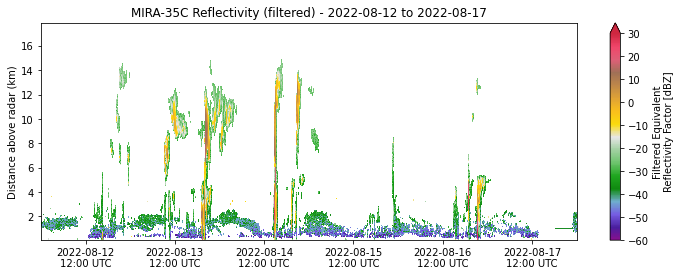

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

mira.filtered_reflectivity.plot(vmin=-60, vmax=30, cmap="pyart_Carbone17", ax=ax)
plt.xlabel("")
plt.ylabel("Distance above radar (km)")
ax.xaxis.set_major_locator(HourLocator(byhour=[12]))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M UTC"))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='center')
plt.title("MIRA-35C Reflectivity (filtered) - 2022-08-12 to 2022-08-17")
plt.savefig("mira_reflectivity_20220812_to_20220817.png", dpi=300, bbox_inches="tight")